In [2]:
#External packages
import sys,glob,os
import numpy as np
import cPickle as pickle
import matplotlib.pylab as plt

#Internal packages
#add path
workbookDir = os.getcwd()
sys.path.append(os.path.dirname(workbookDir)+os.sep+r'\CommonTools')
#imports
import IOTools as io
import FittingTools as ft
import AlignmentTools as at
#for exmploring the data
import MaxViewer as mv

Plan for analysis:
-Old data:
    Fit FISH data for PFA and GA, compare spots per nucleus and brightness distribution
-New data:
    Optimize spot-fitting for gH2AX foci
    Fit gH2AX foci, compare distributions for both PFA vs GA and before and after FISH for new GA

In [21]:
old_data_folder = r'T:\20190305_post_fix_test'
PFA_folder = old_data_folder + os.sep + 'PFA'
EGS_folder = old_data_folder + os.sep + 'EGS-5_mM'
old_subfolders = [PFA_folder, EGS_folder]
analysis_folder = old_data_folder + os.sep + 'analysis'
PFA_daxs = [fl for fl in glob.glob(PFA_folder + os.sep + '*.dax')]
EGS_daxs = [fl for fl in glob.glob(EGS_folder + os.sep + '*.dax')]


In [4]:
%matplotlib notebook

In [10]:
#Fit FISH data
for fov in PFA_daxs:
    dax_fl = fov.replace('.dax','_750.dax')
    finalfit_fl = dax_fl.replace('.dax','_finalfit.npy')
    if not os.path.exists(finalfit_fl):
        im = io.DaxReader(fov).loadMap()
        im_750 = im[0:41]
        io.writeDax(im_750,dax_fl)
        print "Fitting" + fov
        zxyh = ft.return_candidate_centers(im_750,dist_th=20,ex=20,ey=20,ez=2,gmin=2,gmax=5,filtsz=5,th_seed=6,
                                           plt_val=False,save_file=fov.replace('.dax','_fits0.pkl'));
        np.save(finalfit_fl,zxyh)
        
for fov in EGS_daxs:
    dax_fl = fov.replace('.dax','_750.dax')
    finalfit_fl = dax_fl.replace('.dax','_finalfit.npy')
    if not os.path.exists(finalfit_fl):
        im = io.DaxReader(fov).loadMap()
        im_750 = im[0:41]
        io.writeDax(im_750,dax_fl)
        print "Fitting" + fov
        zxyh = ft.return_candidate_centers(im_750,dist_th=20,ex=20,ey=20,ez=2,gmin=2,gmax=5,filtsz=5,th_seed=6,
                                           plt_val=False,save_file=fov.replace('.dax','_fits0.pkl'));
        np.save(finalfit_fl,zxyh)

FittingT:\20190305_post_fix_test\PFA\test_0001.dax
FittingT:\20190305_post_fix_test\PFA\test_0002.dax
FittingT:\20190305_post_fix_test\PFA\test_0003.dax
FittingT:\20190305_post_fix_test\PFA\test_0004.dax
FittingT:\20190305_post_fix_test\EGS-5_mM\test_0001.dax
FittingT:\20190305_post_fix_test\EGS-5_mM\test_0002.dax
FittingT:\20190305_post_fix_test\EGS-5_mM\test_0003.dax
FittingT:\20190305_post_fix_test\EGS-5_mM\test_0004.dax


In [22]:
for fov in EGS_daxs:
    dax_fl = fov.replace('.dax','_750.dax')
    finalfit_fl = dax_fl.replace('.dax','_finalfit.npy')
    #if not os.path.exists(finalfit_fl):
    im = io.DaxReader(fov).loadMap()
    im_750 = im[0:41]
    io.writeDax(im_750,dax_fl)


In [23]:
finalfit_fls = glob.glob(EGS_folder + os.sep + '*_fits0.pkl')
coords = [pickle.load(open(fl,'rb'))['zxyh'] for fl in finalfit_fls]

def fl_to_fov(fl): return int((fl.split('.')[0]).split('_')[1])-1

dic_save = {}
dic_save['class_ids'] = ft.flatten([[fl_to_fov(os.path.basename(fl))]*len(coord) for coord,fl in zip(coords,finalfit_fls)])
dic_save['coords'] = ft.flatten([coord[:,[1,2,0]] for coord in coords])
dic_save['names']= [os.path.basename(fl).split('_fits0')[0] for fl in finalfit_fls]
pickle.dump(dic_save,open(EGS_folder+os.sep+'Selected_Spot.pkl','w'))



In [ ]:
old_data_folder = r'T:\20190305_post_fix_test'
PFA_folder = old_data_folder + os.sep + 'PFA'
EGS_folder = old_data_folder + os.sep + 'EGS-5_mM'

In [40]:
zip(dic_save['coords'],dic_save['class_ids'])

[(array([1294., 2009.,    5.]), 1),
 (array([1792.,  114.,   26.]), 1),
 (array([ 773., 1542.,   32.]), 1),
 (array([ 426., 2005.,   19.]), 1),
 (array([1475.,  608.,   27.]), 1),
 (array([1596., 1381.,   24.]), 1),
 (array([ 877., 2015.,   17.]), 1),
 (array([1428., 1135.,   37.]), 1),
 (array([ 66., 648.,  14.]), 1),
 (array([1853., 1249.,   21.]), 1),
 (array([1202., 1056.,   25.]), 1),
 (array([1386.,  113.,   15.]), 1),
 (array([ 420., 1602.,   16.]), 1),
 (array([1966.,  928.,   27.]), 1),
 (array([ 24., 676.,  28.]), 1),
 (array([858., 963.,  13.]), 1),
 (array([ 900., 1045.,   14.]), 1),
 (array([354., 371.,  22.]), 1),
 (array([1691.,  737.,   31.]), 1),
 (array([1880., 1236.,   25.]), 1),
 (array([448.,  65.,  16.]), 1),
 (array([1222., 1351.,   32.]), 1),
 (array([1183.,  370.,   13.]), 1),
 (array([1865., 1851.,   20.]), 1),
 (array([ 895., 1967.,   21.]), 1),
 (array([1210., 1131.,   20.]), 1),
 (array([ 155., 1256.,   26.]), 1),
 (array([338., 420.,  22.]), 1),
 (array([1

<IPython.core.display.Javascript object>


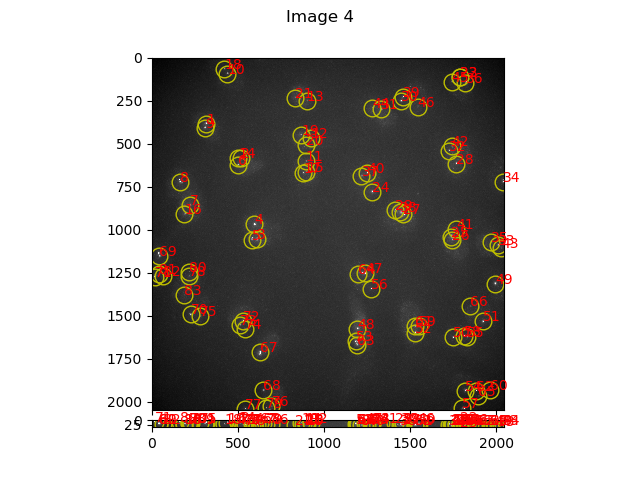

In [24]:
ims = [io.DaxReader(fl).loadMap() for fl in np.sort(glob.glob(EGS_folder+os.sep+'*750.dax'))]#memory map is fine for visualizing
ob = mv.imshow_mark_3d(ims, save_file=EGS_folder+os.sep+'FISH_Selected_Spot.pkl')

In [4]:
%matplotlib notebook

In [25]:
print mv.__file__
#EGS_750_brightnesses = []

E:\Users\Addison\TAD_analysis\ChromatinImagingV2-master\\CommonTools\MaxViewer.py


In [33]:
EGS_750_brightnesses.extend(ob.pfits[:,0])
pickle.dump(EGS_750_brightnesses,open(EGS_folder+r'EGS_FISH_brightnesses.pkl','wb'))

In [38]:
PFA_750_brightnesses

[4894.108330649195,
 3789.240225196943,
 3645.9054199460343,
 3323.3605052864787,
 3071.2351588469196,
 2777.735925982336,
 2533.7889439321725,
 2298.4534298271024,
 1315.4452721390483,
 1169.6258132152586,
 1038.6635210005527,
 6410.008587124586,
 4434.162028558326,
 3756.2783726748844,
 2646.5141391881502,
 2155.983939560163,
 1588.303449249758,
 1469.058174129458,
 685.9107686866588,
 4594.153653424204,
 4362.0908456095585,
 2956.1158860927903,
 2737.0789609298577,
 2022.0197914515406,
 1431.3771484207377,
 978.8227197191972,
 955.3238093003276,
 5011.713363200453,
 4625.166536548508,
 4443.036869265839,
 3354.8811929677818,
 3011.699496921839,
 2509.56461815345,
 1033.5857463477093,
 1012.07888174082,
 5961.872742400138,
 3006.875610169011,
 2586.2703483682967,
 2640.4638676998607,
 1957.9721087708192,
 1453.7773064474045,
 1074.0412260859696,
 5208.996821476605,
 2101.4259620053404,
 6422.83590932873,
 4356.581261048934,
 3576.8888625290547,
 2294.9687249745366,
 1436.553715713658

<IPython.core.display.Javascript object>


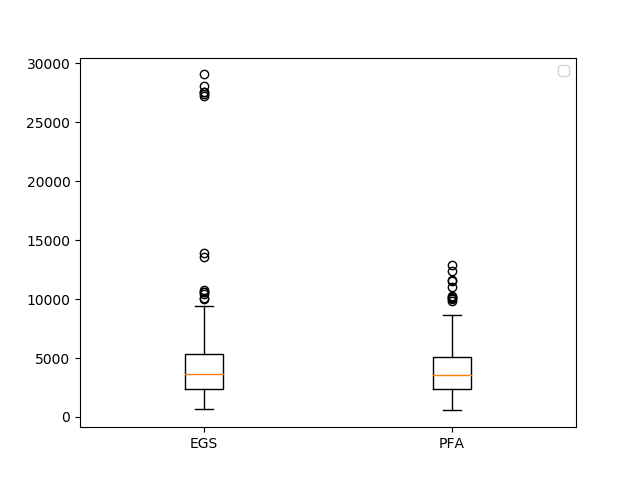

In [49]:
plt.figure()
plt.boxplot([EGS_750_brightnesses,PFA_750_brightnesses],labels=['EGS','PFA'])
plt.legend()
plt.show()

In [55]:
#Pull out gH2AX frames
for fov in PFA_daxs:
    if '750' not in fov:
        dax_fl = fov.replace('.dax','_gH2AX.dax')
        im = io.DaxReader(fov).loadMap()
        im_gH2AX = im[41:82]
        io.writeDax(im_gH2AX,dax_fl)
        
for fov in EGS_daxs:
    if '750' not in fov:
        dax_fl = fov.replace('.dax','_gH2AX.dax')
        im = io.DaxReader(fov).loadMap()
        im_gH2AX = im[41:82]
        io.writeDax(im_gH2AX,dax_fl)

In [54]:
len(im)

41

<IPython.core.display.Javascript object>


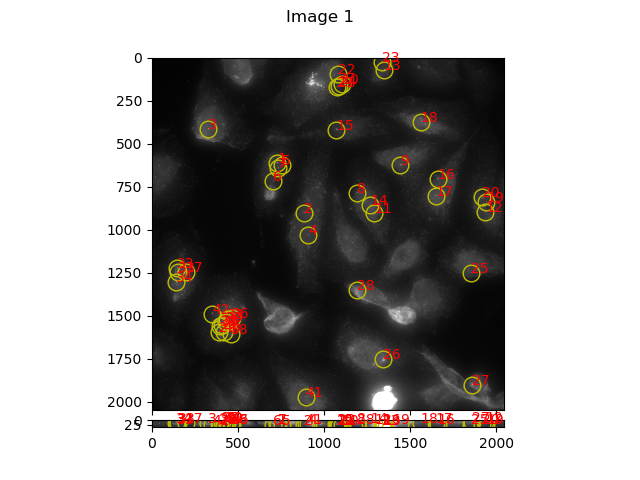

In [72]:
#Image and select spots for PFA gH2AX
ims = [io.DaxReader(fl).loadMap() for fl in np.sort(glob.glob(PFA_folder+os.sep+'*gH2AX.dax'))]#memory map is fine for visualizing
ob1 = mv.imshow_mark_3d(ims, save_file=PFA_folder+os.sep+'gH2AX_Selected_Spot.pkl')
ob1.gfilt_size_max = 5
ob1.gfilt_size_min = 3

In [73]:
print mv.__file__
PFA_647_brightnesses = []

E:\Users\Addison\TAD_analysis\ChromatinImagingV2-master\\CommonTools\MaxViewer.pyc


In [75]:
PFA_647_brightnesses.extend(ob.pfits[:,0])
pickle.dump(PFA_647_brightnesses,open(PFA_folder+r'PFA_gH2AX_brightnesses.pkl','wb'))

In [67]:
reload(mv)

<module 'MaxViewer' from 'E:\Users\Addison\TAD_analysis\ChromatinImagingV2-master\\CommonTools\MaxViewer.pyc'>

<IPython.core.display.Javascript object>


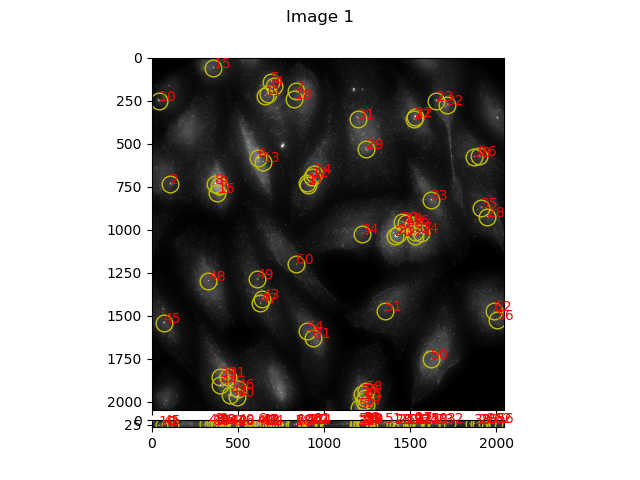

In [68]:
#Image and select spots for EGS gH2AX
ims = [io.DaxReader(fl).loadMap() for fl in np.sort(glob.glob(EGS_folder+os.sep+'*gH2AX.dax'))]#memory map is fine for visualizing
ob = mv.imshow_mark_3d(ims, save_file=EGS_folder+os.sep+'gH2AX_Selected_Spot.pkl')
ob.gfilt_size_max = 5
ob.gfilt_size_min = 3

In [69]:
EGS_647_brightnesses = []

In [70]:
EGS_647_brightnesses.extend(ob.pfits[:,0])
pickle.dump(EGS_647_brightnesses,open(EGS_folder+r'EGS_gH2AX_brightnesses.pkl','wb'))

<IPython.core.display.Javascript object>


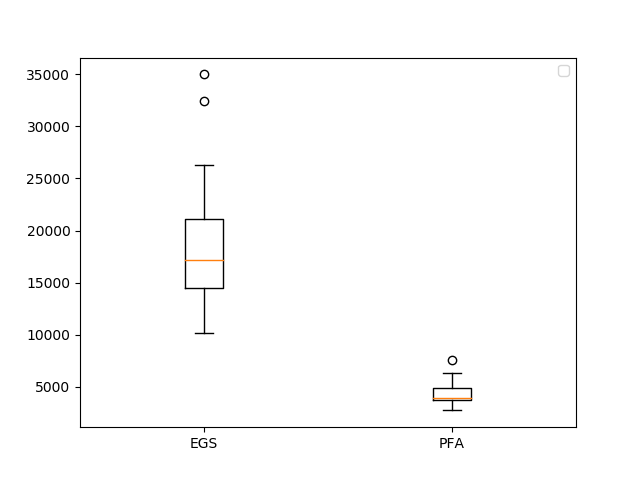

In [76]:
plt.figure()
plt.boxplot([EGS_647_brightnesses,PFA_647_brightnesses],labels=['EGS','PFA'])
plt.legend()
plt.show()

###New data analysis

In [21]:
new_data_folder = r'T:\20190312_post_fix_test'
folder_10_min = new_data_folder + os.sep + '10_min_EGS'
folder_15_min = new_data_folder + os.sep + '15_min_EGS'
folder_20_min = new_data_folder + os.sep + '20_min_EGS'

analysis_folder = new_data_folder + os.sep + 'analysis'
day_1_10_daxs = [fl for fl in glob.glob(folder_10_min + os.sep + 'gH2AX*.dax')]
day_2_10_daxs = [fl for fl in glob.glob(folder_10_min + os.sep + 'post-fix*.dax')]
day_1_15_daxs = [fl for fl in glob.glob(folder_15_min + os.sep + 'gH2AX*.dax')]
day_2_15_daxs = [fl for fl in glob.glob(folder_15_min + os.sep + 'post-fix*.dax')]
day_1_20_daxs = [fl for fl in glob.glob(folder_20_min + os.sep + 'gH2AX*.dax')]
day_2_20_daxs = [fl for fl in glob.glob(folder_20_min + os.sep + 'post-fix*.dax')]


In [28]:
#Pull gH2AX data
'''
for fov in day_1_15_daxs:
    dax_fl = fov.replace('.dax','_gH2AX.dax')
    im = io.DaxReader(fov).loadMap()
    im_647 = im[112:156] 
    io.writeDax(im_647,dax_fl)
'''        
for fov in day_2_15_daxs:
    if 'gH2AX' not in fov:
        dax_fl = fov.replace('.dax','_gH2AX.dax')
        if not os.path.exists(dax_fl):
            im = io.DaxReader(fov).loadMap()
            im_647 = im[156:224]
            io.writeDax(im_647,dax_fl)
'''
for fov in day_1_20_daxs:
    dax_fl = fov.replace('.dax','_gH2AX.dax')
    im = io.DaxReader(fov).loadMap()
    im_647 = im[112:156]
    io.writeDax(im_647,dax_fl)
'''    
for fov in day_2_20_daxs:
    dax_fl = fov.replace('.dax','_gH2AX.dax')
    if not os.path.exists(dax_fl):
        im = io.DaxReader(fov).loadMap()
        im_647 = im[156:224]
        io.writeDax(im_647,dax_fl)

In [26]:
day_2_20_daxs

['T:\\20190312_post_fix_test\\20_min_EGS\\post-fix_0001.dax',
 'T:\\20190312_post_fix_test\\20_min_EGS\\post-fix_0002.dax',
 'T:\\20190312_post_fix_test\\20_min_EGS\\post-fix_0003.dax',
 'T:\\20190312_post_fix_test\\20_min_EGS\\post-fix_0004.dax',
 'T:\\20190312_post_fix_test\\20_min_EGS\\post-fix_0005.dax',
 'T:\\20190312_post_fix_test\\20_min_EGS\\post-fix_0006.dax',
 'T:\\20190312_post_fix_test\\20_min_EGS\\post-fix_0007.dax',
 'T:\\20190312_post_fix_test\\20_min_EGS\\post-fix_0008.dax',
 'T:\\20190312_post_fix_test\\20_min_EGS\\post-fix_0009.dax',
 'T:\\20190312_post_fix_test\\20_min_EGS\\post-fix_0010.dax',
 'T:\\20190312_post_fix_test\\20_min_EGS\\post-fix_0011.dax',
 'T:\\20190312_post_fix_test\\20_min_EGS\\post-fix_0012.dax',
 'T:\\20190312_post_fix_test\\20_min_EGS\\post-fix_0013.dax',
 'T:\\20190312_post_fix_test\\20_min_EGS\\post-fix_0014.dax',
 'T:\\20190312_post_fix_test\\20_min_EGS\\post-fix_0015.dax',
 'T:\\20190312_post_fix_test\\20_min_EGS\\post-fix_0016.dax']

In [5]:
%matplotlib notebook

<IPython.core.display.Javascript object>


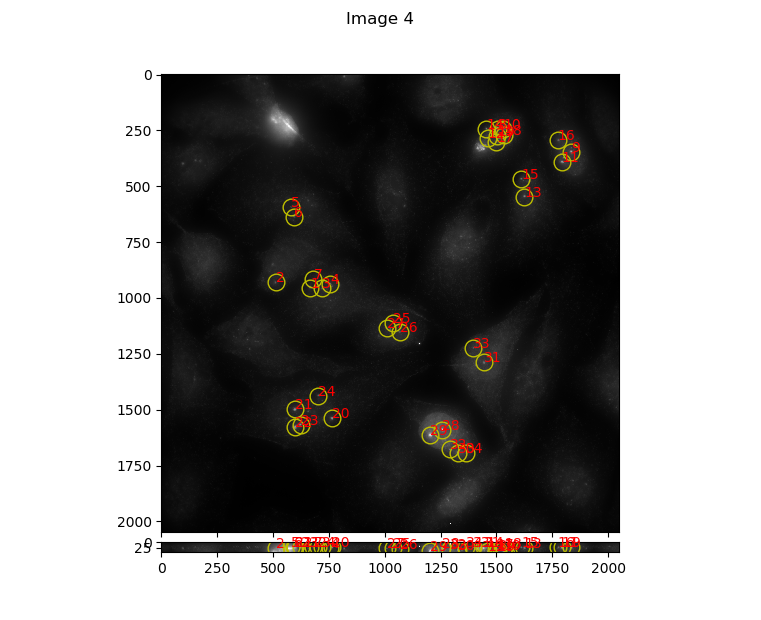

In [6]:
ims = [io.DaxReader(fl).loadMap() for fl in np.sort(glob.glob(folder_15_min+os.sep+'gH2AX*gH2AX.dax'))]#memory map is fine for visualizing
ob = mv.imshow_mark_3d(ims, save_file=folder_15_min+os.sep+'gH2AX_Selected_Spot.pkl')
ob.gfilt_size_max = 5
ob.gfilt_size_min = 3

In [7]:
#day_1_15_brightnesses = []

In [12]:
day_1_15_brightnesses.extend(ob.pfits[:,0])
pickle.dump(day_1_15_brightnesses,open(folder_15_min+r'day_1_gH2AX_brightnesses.pkl','wb'))

<IPython.core.display.Javascript object>


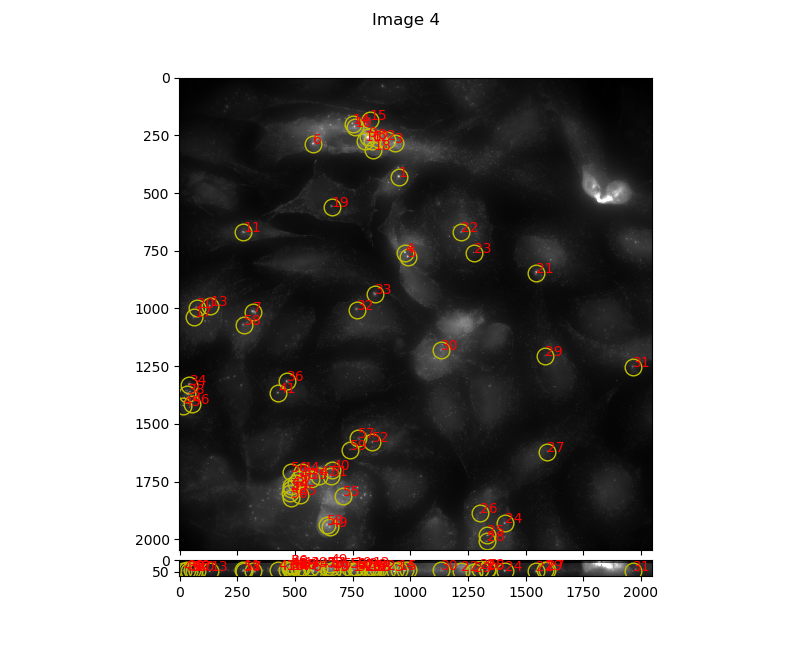

In [29]:
ims = [io.DaxReader(fl).loadMap() for fl in np.sort(glob.glob(folder_15_min+os.sep+'post*gH2AX.dax'))]#memory map is fine for visualizing
ob1 = mv.imshow_mark_3d(ims, save_file=folder_15_min+os.sep+'day_2_gH2AX_Selected_Spot.pkl')
ob1.gfilt_size_max = 5
ob1.gfilt_size_min = 3

In [19]:
#day_2_15_brightnesses = []

In [32]:
day_2_15_brightnesses.extend(ob.pfits[:,0])
pickle.dump(day_2_15_brightnesses,open(folder_15_min+r'day_2_gH2AX_brightnesses.pkl','wb'))

<IPython.core.display.Javascript object>


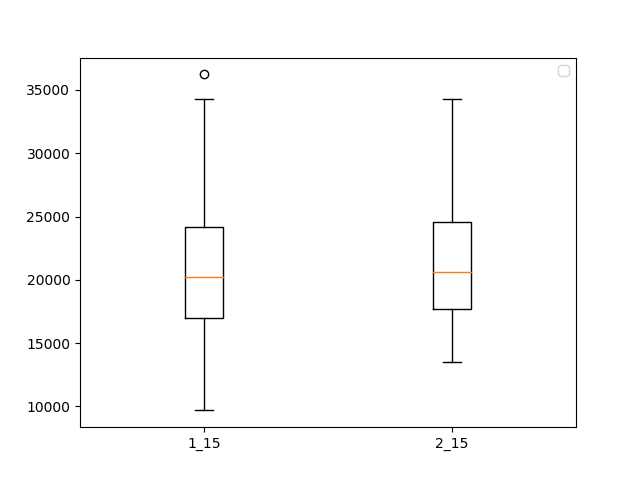

In [33]:
plt.figure()
plt.boxplot([day_1_15_brightnesses,day_2_15_brightnesses],labels=['1_15','2_15'])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


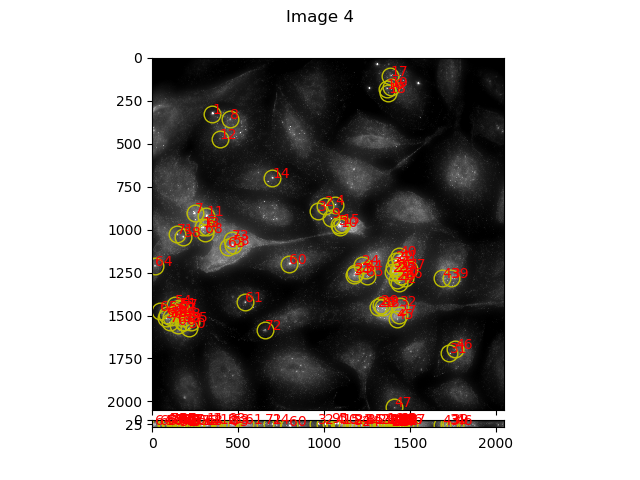

In [34]:
ims = [io.DaxReader(fl).loadMap() for fl in np.sort(glob.glob(folder_20_min+os.sep+'gH2AX*gH2AX.dax'))]#memory map is fine for visualizing
ob2 = mv.imshow_mark_3d(ims, save_file=folder_20_min+os.sep+'gH2AX_Selected_Spot.pkl')
ob2.gfilt_size_max = 8
ob2.gfilt_size_min = 3

In [36]:
ob2.gfilt_size_max = 8
ob2.gfilt_size_min = 5

In [37]:
#day_1_20_brightnesses = []

In [41]:
day_1_20_brightnesses.extend(ob.pfits[:,0])
pickle.dump(day_1_20_brightnesses,open(folder_20_min+r'day_1_gH2AX_brightnesses.pkl','wb'))

<IPython.core.display.Javascript object>


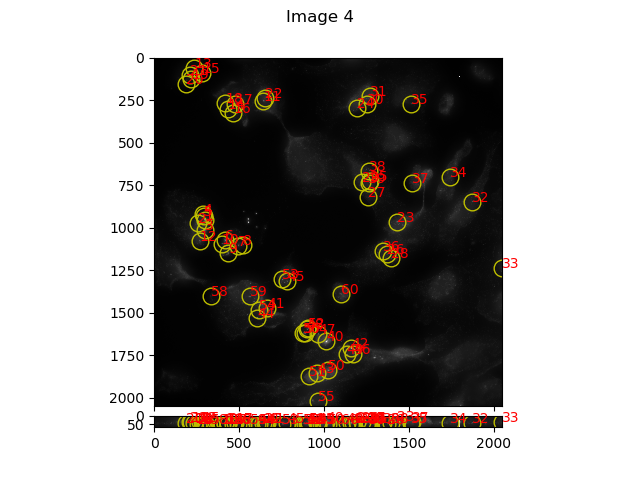

In [42]:
ims = [io.DaxReader(fl).loadMap() for fl in np.sort(glob.glob(folder_20_min+os.sep+'post*gH2AX.dax'))]#memory map is fine for visualizing
ob3 = mv.imshow_mark_3d(ims, save_file=folder_20_min+os.sep+'day_2_Selected_Spot.pkl')
ob3.gfilt_size_max = 8
ob3.gfilt_size_min = 5

In [43]:
#day_2_20_brightnesses = []

In [47]:
day_2_20_brightnesses.extend(ob.pfits[:,0])
pickle.dump(day_2_20_brightnesses,open(folder_20_min+r'day_2_gH2AX_brightnesses.pkl','wb'))

<IPython.core.display.Javascript object>


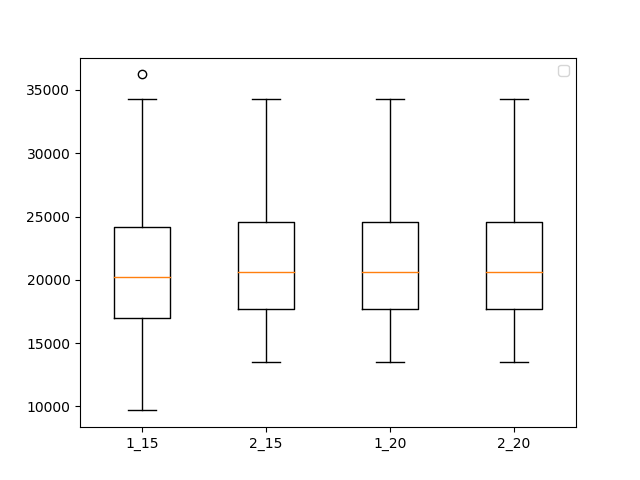

In [49]:
plt.figure()
plt.boxplot([day_1_15_brightnesses,day_2_15_brightnesses,day_1_20_brightnesses,day_2_20_brightnesses],labels=['1_15','2_15','1_20','2_20'])
plt.legend()
plt.show()

In [50]:
#Pull FISH data
     
for fov in day_2_15_daxs:
    if 'gH2AX' not in fov:
        dax_fl = fov.replace('.dax','_750.dax')
        if not os.path.exists(dax_fl):
            im = io.DaxReader(fov).loadMap()
            im_750 = im[224:280]
            io.writeDax(im_750,dax_fl)

for fov in day_2_20_daxs:
    if 'gH2AX' not in fov:
        dax_fl = fov.replace('.dax','_750.dax')
        if not os.path.exists(dax_fl):
            im = io.DaxReader(fov).loadMap()
            im_750 = im[224:280]
            io.writeDax(im_750,dax_fl)

<IPython.core.display.Javascript object>


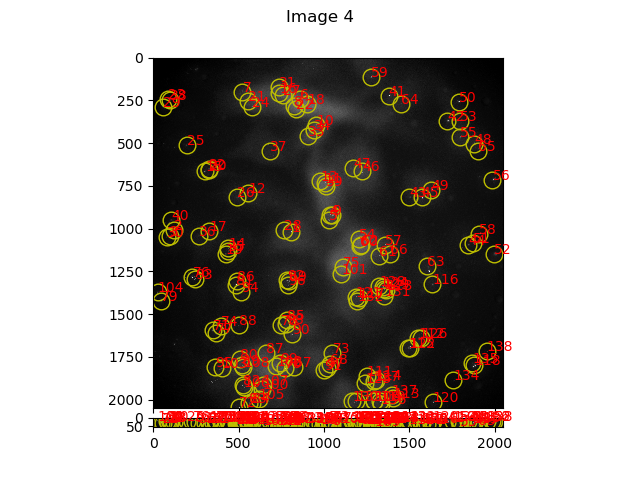

In [51]:
ims = [io.DaxReader(fl).loadMap() for fl in np.sort(glob.glob(folder_15_min+os.sep+'post*_750.dax'))]#memory map is fine for visualizing
ob4 = mv.imshow_mark_3d(ims, save_file=folder_15_min+os.sep+'FISH_Selected_Spot.pkl')
ob4.gfilt_size_max = 3
ob4.gfilt_size_min = 1

In [55]:
#fish_15_brightnesses = []

In [59]:
fish_15_brightnesses.extend(ob.pfits[:,0])
pickle.dump(fish_15_brightnesses,open(folder_15_min+r'day_2_FISH_brightnesses.pkl','wb'))

<IPython.core.display.Javascript object>


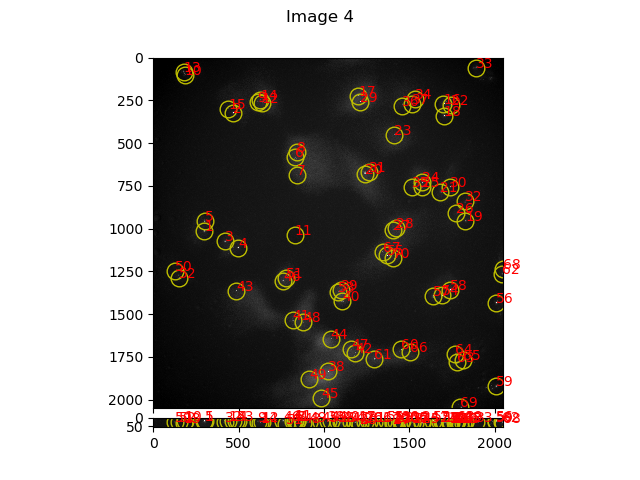

In [60]:
ims = [io.DaxReader(fl).loadMap() for fl in np.sort(glob.glob(folder_20_min+os.sep+'post*_750.dax'))]#memory map is fine for visualizing
ob5 = mv.imshow_mark_3d(ims, save_file=folder_20_min+os.sep+'FISH_Selected_Spot.pkl')
ob5.gfilt_size_max = 3
ob5.gfilt_size_min = 1

In [61]:
fish_20_brightnesses = []

In [65]:
fish_20_brightnesses.extend(ob.pfits[:,0])
pickle.dump(fish_20_brightnesses,open(folder_20_min+r'day_2_FISH_brightnesses.pkl','wb'))

<IPython.core.display.Javascript object>


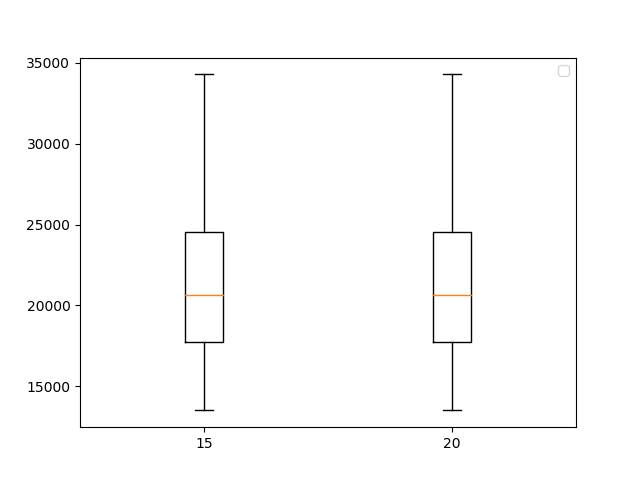

In [66]:
plt.figure()
plt.boxplot([fish_15_brightnesses,fish_20_brightnesses],labels=['15','20'])
plt.legend()
plt.show()